In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
pd.set_option("display.max_columns",100)
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
d=pd.read_csv(r"C:\Users\shesh\Desktop\sheshank_doc\ML\datasets\breast-cancer.csv")

In [3]:
d.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
d=d.drop(["id"],axis=1)

In [5]:
d["diagnosis"]=d["diagnosis"].map({"M":1,"B":0})

In [6]:
d["diagnosis"].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [7]:
X=d.drop(["diagnosis"],axis=1)
y=d["diagnosis"]

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=33,stratify=y,test_size=0.2)

In [9]:
y_train.value_counts()

0    285
1    170
Name: diagnosis, dtype: int64

In [10]:
y_test.value_counts()

0    72
1    42
Name: diagnosis, dtype: int64

In [20]:
xgb_clf=xgb.XGBClassifier()

In [21]:
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [22]:
pred=xgb_clf.predict(X_test)

In [23]:
f1_score(pred,y_test)

0.8717948717948718

In [24]:
confusion_matrix(y_test,pred)

array([[70,  2],
       [ 8, 34]], dtype=int64)

In [26]:
def class_report(actual_y,data_to_predict):
    predictions=xgb_clf.predict(data_to_predict)
    return classification_report(actual_y,predictions)

In [27]:
print(class_report(y_test,X_test))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        72
           1       0.94      0.81      0.87        42

    accuracy                           0.91       114
   macro avg       0.92      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



In [28]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs


We start by selection the "best" 10 features from the  dataset via Sequential Forward Selection (SFS). Here, we set forward=True and floating=False. By choosing cv=5, we perform cross-validation.

We used F1 score as the performance metric as the dataset is imbalanced.

In [63]:
clf = xgb.XGBClassifier(n_estimators=100, n_jobs=-1)

# Build step forward feature selection
sfs1 = sfs(clf,
           k_features=10,
           forward=False,
           floating=True,
           verbose=2,
           scoring='recall',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    7.6s finished

[2023-02-28 17:47:11] Features: 29/10 -- score: 0.9647058823529413[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    6.8s finished

[2023-02-28 17:47:18] Features: 28/10 -- score: 0.9764705882352942[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    6.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    6.3s finished

[2023-02-28 17:49:27] Features: 13/10 -- score: 0.9764705882352942[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    4.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    6.8s finished

[2023-02-28 17:49:39] Features: 12/10 -- score: 0.9764705882352942[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    4.6s finished
[Parallel(n_jobs=1)]: U

#### In order to look at the selected feature indices at each step we can use model.subsets_:

In [64]:
sfs1.subsets_

{30: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29),
  'cv_scores': array([0.97058824, 1.        , 0.97058824, 0.94117647, 0.91176471]),
  'avg_score': 0.9588235294117649,
  'feature_names': ('radius_mean',
   'texture_mean',
   'perimeter_mean',
   'area_mean',
   'smoothness_mean',
   'compactness_mean',
   'concavity_mean',
   'concave points_mean',
   'symmetry_mean',
   'fractal_dimension_mean',
   'radius_se',
   'texture_se',
   'perimeter_se',
   'area_se',
   'smoothness_se',
   'compactness_se',
   'concavity_se',
   'concave points_se',
   'symmetry_se',
   'fractal_dimension_se',
   'radius_worst',
   'texture_worst',
   'perimeter_worst',
   'area_worst',
   'smoothness_worst',
   'compactness_worst',
   'concavity_worst',
   'concave points_worst',
   'symmetry_worst',
   'fractal_dimension_worst')},
 29: {'

#### we can access the indices of the 3 best features directly via the k_feature_idx_ attribute:

In [65]:
# Which features?
feat_index = list(sfs1.k_feature_idx_)
print(feat_index)

[1, 6, 7, 15, 19, 21, 22, 23, 24, 27]


To obtain the names of these features, given that we provided an argument to the custom_feature_names parameter, we can refer to the sfs1.k_feature_names_ attribute:

In [66]:
feat_cols=list(sfs1.k_feature_names_)
feat_cols

['texture_mean',
 'concavity_mean',
 'concave points_mean',
 'compactness_se',
 'fractal_dimension_se',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'concave points_worst']

#### To get the best score

In [67]:
sfs1.k_score_

0.9764705882352942

### Visualizing the results in DataFrames

In [68]:
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
30,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9705882352941176, 1.0, 0.9705882352941176, ...",0.958824,"(radius_mean, texture_mean, perimeter_mean, ar...",0.038551,0.029994,0.014997
29,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9705882352941176, 1.0, 1.0, 0.9411764705882...",0.964706,"(radius_mean, texture_mean, perimeter_mean, ar...",0.044085,0.0343,0.01715
28,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9705882352941176, 1.0, 1.0, 0.9705882352941...",0.976471,"(radius_mean, texture_mean, perimeter_mean, ar...",0.028289,0.02201,0.011005
27,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15,...","[0.9705882352941176, 1.0, 1.0, 0.9705882352941...",0.982353,"(radius_mean, texture_mean, perimeter_mean, ar...",0.018519,0.014409,0.007204
26,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15,...","[0.9705882352941176, 1.0, 1.0, 0.9705882352941...",0.982353,"(radius_mean, texture_mean, perimeter_mean, ar...",0.018519,0.014409,0.007204
25,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15,...","[0.9705882352941176, 1.0, 1.0, 0.9705882352941...",0.982353,"(radius_mean, texture_mean, perimeter_mean, ar...",0.018519,0.014409,0.007204
24,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15,...","[0.9705882352941176, 1.0, 1.0, 0.9705882352941...",0.982353,"(radius_mean, texture_mean, perimeter_mean, ar...",0.018519,0.014409,0.007204
23,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15,...","[0.9705882352941176, 1.0, 1.0, 0.9705882352941...",0.982353,"(radius_mean, texture_mean, perimeter_mean, ar...",0.018519,0.014409,0.007204
22,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 19,...","[0.9705882352941176, 1.0, 1.0, 0.9705882352941...",0.982353,"(radius_mean, texture_mean, perimeter_mean, ar...",0.018519,0.014409,0.007204
21,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 15, 19, 21,...","[0.9705882352941176, 1.0, 1.0, 0.9705882352941...",0.982353,"(radius_mean, texture_mean, perimeter_mean, ar...",0.018519,0.014409,0.007204


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: xlabel='Number of Features', ylabel='Performance'>)

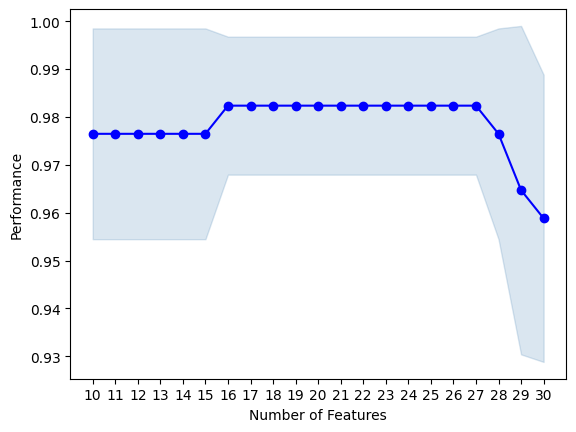

In [69]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
plot_sfs(sfs1.get_metric_dict(), kind='std_dev')

In [70]:
def class_report(actual_y,data_to_predict,classifier):
    predictions=classifier.predict(data_to_predict)
    return classification_report(actual_y,predictions)

In [71]:
X_train[feat_cols].head()

,texture_mean,concavity_mean,concave points_mean,compactness_se,fractal_dimension_se,texture_worst,perimeter_worst,area_worst,smoothness_worst,concave points_worst
111,20.76,0.10650,0.06021,0.04042,0.005891,25.47,89.00,527.4,0.1287,0.11050
463,18.36,0.03367,0.01777,0.01701,0.002768,24.02,82.68,495.1,0.1342,0.08288
268,16.21,0.03900,0.01615,0.02178,0.002157,23.64,89.27,597.5,0.1256,0.05780
20,15.71,0.04568,0.03110,0.01898,0.002425,20.49,96.09,630.5,0.1312,0.07283
520,13.90,0.03332,0.02421,0.02540,0.003901,17.84,67.84,326.6,0.1850,0.07262


In [72]:
# Build full model with selected features
clf1 = xgb.XGBClassifier(n_estimators=1000, random_state=42, max_depth=4)
clf1.fit(X_train[feat_cols], y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [73]:
def class_report(actual_y,data_to_predict,classifier):
    predictions=classifier.predict(data_to_predict)
    return classification_report(actual_y,predictions)

In [74]:
y_train_pred = clf1.predict(X_train[feat_cols])
print('Training accuracy on selected features')
print(classification_report(y_train, y_train_pred))



Training accuracy on selected features
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       285
           1       1.00      1.00      1.00       170

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [75]:
y_test_pred = clf1.predict(X_test[feat_cols])
print('Testing accuracy on selected features: ')
print(classification_report(y_test, y_test_pred))


Testing accuracy on selected features: 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        72
           1       0.95      0.83      0.89        42

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114

